In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
G = 9.81

In [ ]:
class Nelikulmio:
  # A, B, C, D, A
  _coordinates: list[list[float, float]] = [[0.0, 0.0],
                                            [0.0, 0.0],
                                            [0.0, 0.0],
                                            [0.0, 0.0],
                                            [0.0, 0.0]]
  
  _xcm: float = 0.0
  _ycm: float = 0.0

  _mass: float = 0.0

  def __init__(self,
               a: list[float, float],
               b: list[float, float],
               c: list[float, float],
               d: list[float, float],
               mass: float) -> None:
    
    self._coordinates = [a, b, c, d, a]
    self.calculate_cm()
    
    self._mass = mass

  def move(self, x_change: float, y_change: float) -> None:
    self._xcm += x_change
    self._ycm += y_change
  
  def rotate(self) -> None:
    pass

  def print(self):
    return ([x[0] + self._xcm for x in self._coordinates],
            [y[0] + self._ycm for y in self._coordinates])

  # Lasketaan uudet massakeskeispisteet
  def calculate_cm(self) -> None:
    for c in range(4):
      self._xcm += self._coordinates[c][0]
      self._ycm += self._coordinates[c][1]
    
    self._xcm *= 1.0 / 4
    self._ycm *= 1.0 / 4

    

    
  

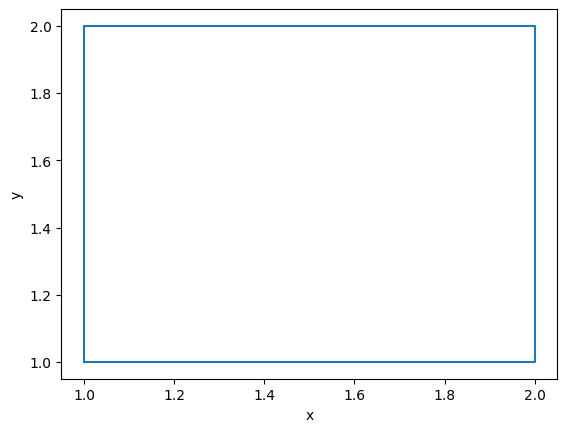

1.5 1.5


In [ ]:
bingus = Nelikulmio((1.0, 1.0), (2.0, 1.0), (2.0, 2.0), (1.0, 2.0), 2.0)
bongus = Nelikulmio((2.0, 2.0), (3.0, 2.0), (3.0, 3.0), (2.0, 3.0), 2.0)

xcoords_a = [x[0] for x in bingus._coordinates]
ycoords_a = [y[1] for y in bingus._coordinates]

end_coords_x = [xcoords_a]
end_coords_y = [ycoords_a]

bingus.move

# xcoords_b = [x[0] for x in bongus._coordinates]
# ycoords_b = [y[1] for y in bongus._coordinates]

# xcoords_a.append(xcoords_a[0])
# ycoords_a.append(ycoords_a[0])

# xcoords_b.append(xcoords_b[0])
# ycoords_b.append(ycoords_b[0])

plt.plot(xcoords_a, ycoords_a)
# plt.plot(xcoords_b, ycoords_b)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(bingus._xcm, bingus._ycm)

In [59]:
while len(bingus._xlist) < 10:
  bingus.move(1.0, 0.0)

plt.plot(bingus._xlist, bingus._ylist)
# plt.plot(xcoords_b, ycoords_b)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

AttributeError: 'Nelikulmio' object has no attribute '_xlist'